<a href="https://colab.research.google.com/github/jenniferchinchc/blank-app/blob/main/545%20scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
print("import success")

import success


In [ ]:
nRowsRead = 1000

# target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
# ids: The id of the tweet ( 2087)
# date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
# flag: The query (lyx). If there is no query, then this value is NO_QUERY.
# user: the user that tweeted (robotickilldozr)
# text: the text of the tweet (Lyx is cool)

df = pd.read_csv("concatenated.csv",delimiter=',',
#                 nrows = nRowsRead,
                encoding='latin-1',
                names= ['tweet','label'])




In [ ]:
df = df.sample(n=10000).reset_index()


In [ ]:
df

,index,tweet,label
0,10477,790 new cases of #COVID19Nigeria; Delta-166 La...,real
1,6988,Says COVID-19 remains in the air for eight hou...,fake
2,3929,Maharashtra Legislative Assembly member Jitend...,fake
3,3270,#IndiaFightsCorona 86052 new confirmed cases h...,real
4,835,745 new cases of #COVID19Nigeria; Lagos-280 Oy...,real
...,...,...,...
9995,2848,Using cypress and eucalyptus vapor as a treatm...,fake
9996,6411,"Nigerians are ""burning Chinese stores."".",fake
9997,5575,Bitter gourd juice can cure coronavirus.,fake
9998,2902,John and Edward Grimes have been praised on so...,real


In [ ]:
df.tail()

,index,tweet,label
9995,2848,Using cypress and eucalyptus vapor as a treatm...,fake
9996,6411,"Nigerians are ""burning Chinese stores."".",fake
9997,5575,Bitter gourd juice can cure coronavirus.,fake
9998,2902,John and Edward Grimes have been praised on so...,real
9999,9279,The World Health Organization (WHO) released a...,fake


In [ ]:
display(df.describe(include = [object]))

,tweet,label
count,10000,10000
unique,9999,3
top,Our combined total of confirmed and probable c...,real
freq,2,5222


In [ ]:
df

,index,tweet,label
0,10477,790 new cases of #COVID19Nigeria; Delta-166 La...,real
1,6988,Says COVID-19 remains in the air for eight hou...,fake
2,3929,Maharashtra Legislative Assembly member Jitend...,fake
3,3270,#IndiaFightsCorona 86052 new confirmed cases h...,real
4,835,745 new cases of #COVID19Nigeria; Lagos-280 Oy...,real
...,...,...,...
9995,2848,Using cypress and eucalyptus vapor as a treatm...,fake
9996,6411,"Nigerians are ""burning Chinese stores."".",fake
9997,5575,Bitter gourd juice can cure coronavirus.,fake
9998,2902,John and Edward Grimes have been praised on so...,real


In [ ]:
df.head()

,index,tweet,label
0,10477,790 new cases of #COVID19Nigeria; Delta-166 La...,real
1,6988,Says COVID-19 remains in the air for eight hou...,fake
2,3929,Maharashtra Legislative Assembly member Jitend...,fake
3,3270,#IndiaFightsCorona 86052 new confirmed cases h...,real
4,835,745 new cases of #COVID19Nigeria; Lagos-280 Oy...,real


In [ ]:
import string
import re

# Load the concatenated CSV file into a dataframe
df = pd.read_csv("concatenated.csv")

def process_text(x):
   text = re.sub('\s+\n+', ' ', x)
   text = re.sub('[^a-zA-Z0-9]', ' ', x)
   text = re.sub('^\s+', '', x)
   text = text.lower()
   text = text.split()
   text = ' '.join(text)

   return text

# Make sure the dataframe has a 'tweet' column
if 'tweet' in df.columns:
    # Apply the process_text function to the 'tweet' column
    df['clean_text'] = df['tweet'].apply(process_text)
else:
    print("Error: 'tweet' column not found in dataframe.")

In [ ]:
df.head()

,tweet,label,clean_text
0,The CDC currently reports 99031 deaths. In gen...,real,the cdc currently reports 99031 deaths. in gen...
1,States reported 1121 deaths a small rise from ...,real,states reported 1121 deaths a small rise from ...
2,Politically Correct Woman (Almost) Uses Pandem...,fake,politically correct woman (almost) uses pandem...
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,#indiafightscorona: we have 1524 #covid testin...
4,Populous states can generate large case counts...,real,populous states can generate large case counts...


In [ ]:
df

,tweet,label,clean_text
0,The CDC currently reports 99031 deaths. In gen...,real,the cdc currently reports 99031 deaths. in gen...
1,States reported 1121 deaths a small rise from ...,real,states reported 1121 deaths a small rise from ...
2,Politically Correct Woman (Almost) Uses Pandem...,fake,politically correct woman (almost) uses pandem...
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,#indiafightscorona: we have 1524 #covid testin...
4,Populous states can generate large case counts...,real,populous states can generate large case counts...
...,...,...,...
10695,#CoronaVirusUpdates: State-wise details of Tot...,real,#coronavirusupdates: state-wise details of tot...
10696,Tonight 12(midnight) onwards Disaster Manageme...,fake,tonight 12(midnight) onwards disaster manageme...
10697,296 new cases of #COVID19Nigeria; Plateau-85 E...,real,296 new cases of #covid19nigeria; plateau-85 e...
10698,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real,rt @cdcemergency: #dyk? @cdcgov’s one-stop sho...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


vectors_text = TfidfVectorizer(analyzer=process_text).fit(df['clean_text'])
len(vectors_text.vocabulary_)

416

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


In [ ]:
df

,tweet,label,clean_text,label_encoded
0,The CDC currently reports 99031 deaths. In gen...,real,the cdc currently reports 99031 deaths. in gen...,1
1,States reported 1121 deaths a small rise from ...,real,states reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,fake,politically correct woman (almost) uses pandem...,0
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,#indiafightscorona: we have 1524 #covid testin...,1
4,Populous states can generate large case counts...,real,populous states can generate large case counts...,1
...,...,...,...,...
10695,#CoronaVirusUpdates: State-wise details of Tot...,real,#coronavirusupdates: state-wise details of tot...,1
10696,Tonight 12(midnight) onwards Disaster Manageme...,fake,tonight 12(midnight) onwards disaster manageme...,0
10697,296 new cases of #COVID19Nigeria; Plateau-85 E...,real,296 new cases of #covid19nigeria; plateau-85 e...,1
10698,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real,rt @cdcemergency: #dyk? @cdcgov’s one-stop sho...,1


In [ ]:
# Encode the label column as a numerical vector class
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['target'] = le.fit_transform(df['label_encoded'])


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.25, stratify=df['target'], random_state=42)


# Train and evaluate your models
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


def compute_metrics(predictions, true_labels):
  labels = true_labels
  preds = predictions
  precision, recall, f1, _ = precision_recall_fscore_support(labels, preds,
                                                             average='macro')
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
      'precision': precision,
      'recall': recall,
      'f1': f1
  }


ML_results = pd.DataFrame(columns=['Type', 'Model', 'accuracy', 'precision', 'recall', 'f1'])


model_names = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree C4.5', 'SVM', 'Logistic']
models = [MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier(), LinearSVC(), LogisticRegression()]


model_dict = dict(zip(model_names, models))

vectorizer = TfidfVectorizer()

for modelkey, modelvalue in model_dict.items():
  model = Pipeline(steps=[('vectorizer', vectorizer),
                          ('classifier', modelvalue)])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  metrics_list = compute_metrics(y_pred, y_test)
  results = pd.DataFrame(metrics_list, columns=['accuracy', 'precision', 'recall', 'f1'], index=[0])
  results['Type'] = 'Classical Machine Learning'
  results['Model'] = modelkey
  results = results[['Type', 'Model', 'accuracy', 'precision', 'recall', 'f1']]
  ML_results = pd.concat([ML_results, results])


display(ML_results)


,Type,Model,accuracy,precision,recall,f1
0,Classical Machine Learning,Naive Bayes,0.917383,0.923798,0.914699,0.916546
0,Classical Machine Learning,K-Nearest Neighbors,0.917383,0.917958,0.916555,0.917079
0,Classical Machine Learning,Decision Tree C4.5,0.895327,0.896440,0.894083,0.894835
0,Classical Machine Learning,SVM,0.951776,0.952542,0.951022,0.951598
0,Classical Machine Learning,Logistic,0.934953,0.935927,0.934006,0.934686


In [ ]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
# X = vectorizer.fit_transform(df['tweet'].values.tolist()).toarray()
# y = df['tweet'].values

In [ ]:
# target	ids	date	flag	user	text	month	time_of_day	clean_text	positive	negative
def compute_metrics(predictions, true_labels):
    labels = true_labels
    preds = predictions
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds,
                                                               average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test  = train_test_split(X, df["target"], test_size = 0.25, stratify = df["target"], random_state = 42)

# X_train = train[['time_of_day', 'positive', 'negative']]
# y_train = train.target

# X_test = test[[ 'time_of_day', 'positive', 'negative']]
# y_test = test.target

ML_results = pd.DataFrame(columns = ['Type', 'Model', 'accuracy',
                                     'precision', 'recall', 'f1'])

model_names = ['Naive Bayes', 'K-Nearest Neighbors',
               'Decision Tree C4.5', 'SVM',"Logistic"]

models = [MultinomialNB(), KNeighborsClassifier(),
          DecisionTreeClassifier(), LinearSVC(),LogisticRegression()]

model_dict = dict(zip(model_names, models))

for modelkey, modelvalue in model_dict.items():
    print(1)
    model = modelvalue.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_list = compute_metrics(y_pred, y_test)
      #---------------------------------------------------------------#
    results = pd.DataFrame(metrics_list, columns = ['accuracy', 'precision', 'recall', 'f1'], index=[0])
    results['Type'] = 'Classical Machine Learning'
    results['Model'] = modelkey
    results = results[['Type', 'Model', 'accuracy', 'precision', 'recall', 'f1']]
    ML_results = pd.concat([ML_results, results])


display(ML_results)

1
1
1
1
1


,Type,Model,accuracy,precision,recall,f1
0,Classical Machine Learning,Naive Bayes,0.7308,0.731270,0.730704,0.730607
0,Classical Machine Learning,K-Nearest Neighbors,0.5476,0.621264,0.549143,0.469544
0,Classical Machine Learning,Decision Tree C4.5,0.6540,0.653994,0.653990,0.653991
0,Classical Machine Learning,SVM,0.7252,0.725399,0.725255,0.725168
0,Classical Machine Learning,Logistic,0.7436,0.743615,0.743613,0.743600


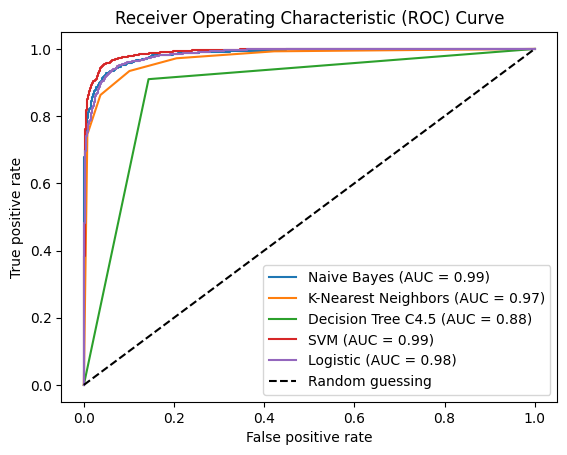

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

for modelkey, modelvalue in model_dict.items():
    model = Pipeline(steps=[('vectorizer', vectorizer),
                            ('classifier', modelvalue)])
    model.fit(X_train, y_train)
    if hasattr(modelvalue, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # predicted probabilities for positive class
    else:
        y_pred_prob = model.decision_function(X_test)  # use decision_function() instead of predict_proba() for LinearSVC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{modelkey} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


AttributeError: ignored

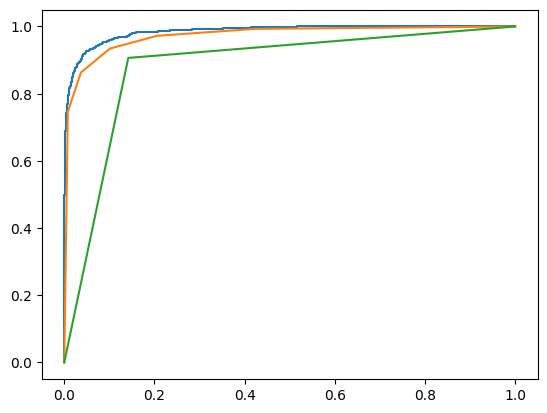

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

for modelkey, modelvalue in model_dict.items():
    model = Pipeline(steps=[('vectorizer', vectorizer),
                            ('classifier', modelvalue)])
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # predicted probabilities for positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{modelkey} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()